In [1]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.clustering import *
from sklearn.datasets import make_blobs
mpl.rcParams['figure.dpi'] = 300

In [2]:
cols = ['column1', 'column2', 'column3',
        'column4', 'column5']
arr = make_blobs(n_samples = 1000, n_features = 5, random_state =20,
                 centers = 3, cluster_std = 1)
data = pd.DataFrame(data = arr[0], columns = cols)
data.head()

,column1,column2,column3,column4,column5
0,2.916076,6.504857,8.246937,6.185952,-9.776481
1,-2.044462,5.282757,5.265467,7.487941,6.347177
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881
3,2.155568,8.776136,5.788650,5.751763,-7.609132
4,-6.650020,5.458227,5.848407,7.150584,5.992247


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   column1  1000 non-null   float64
 1   column2  1000 non-null   float64
 2   column3  1000 non-null   float64
 3   column4  1000 non-null   float64
 4   column5  1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


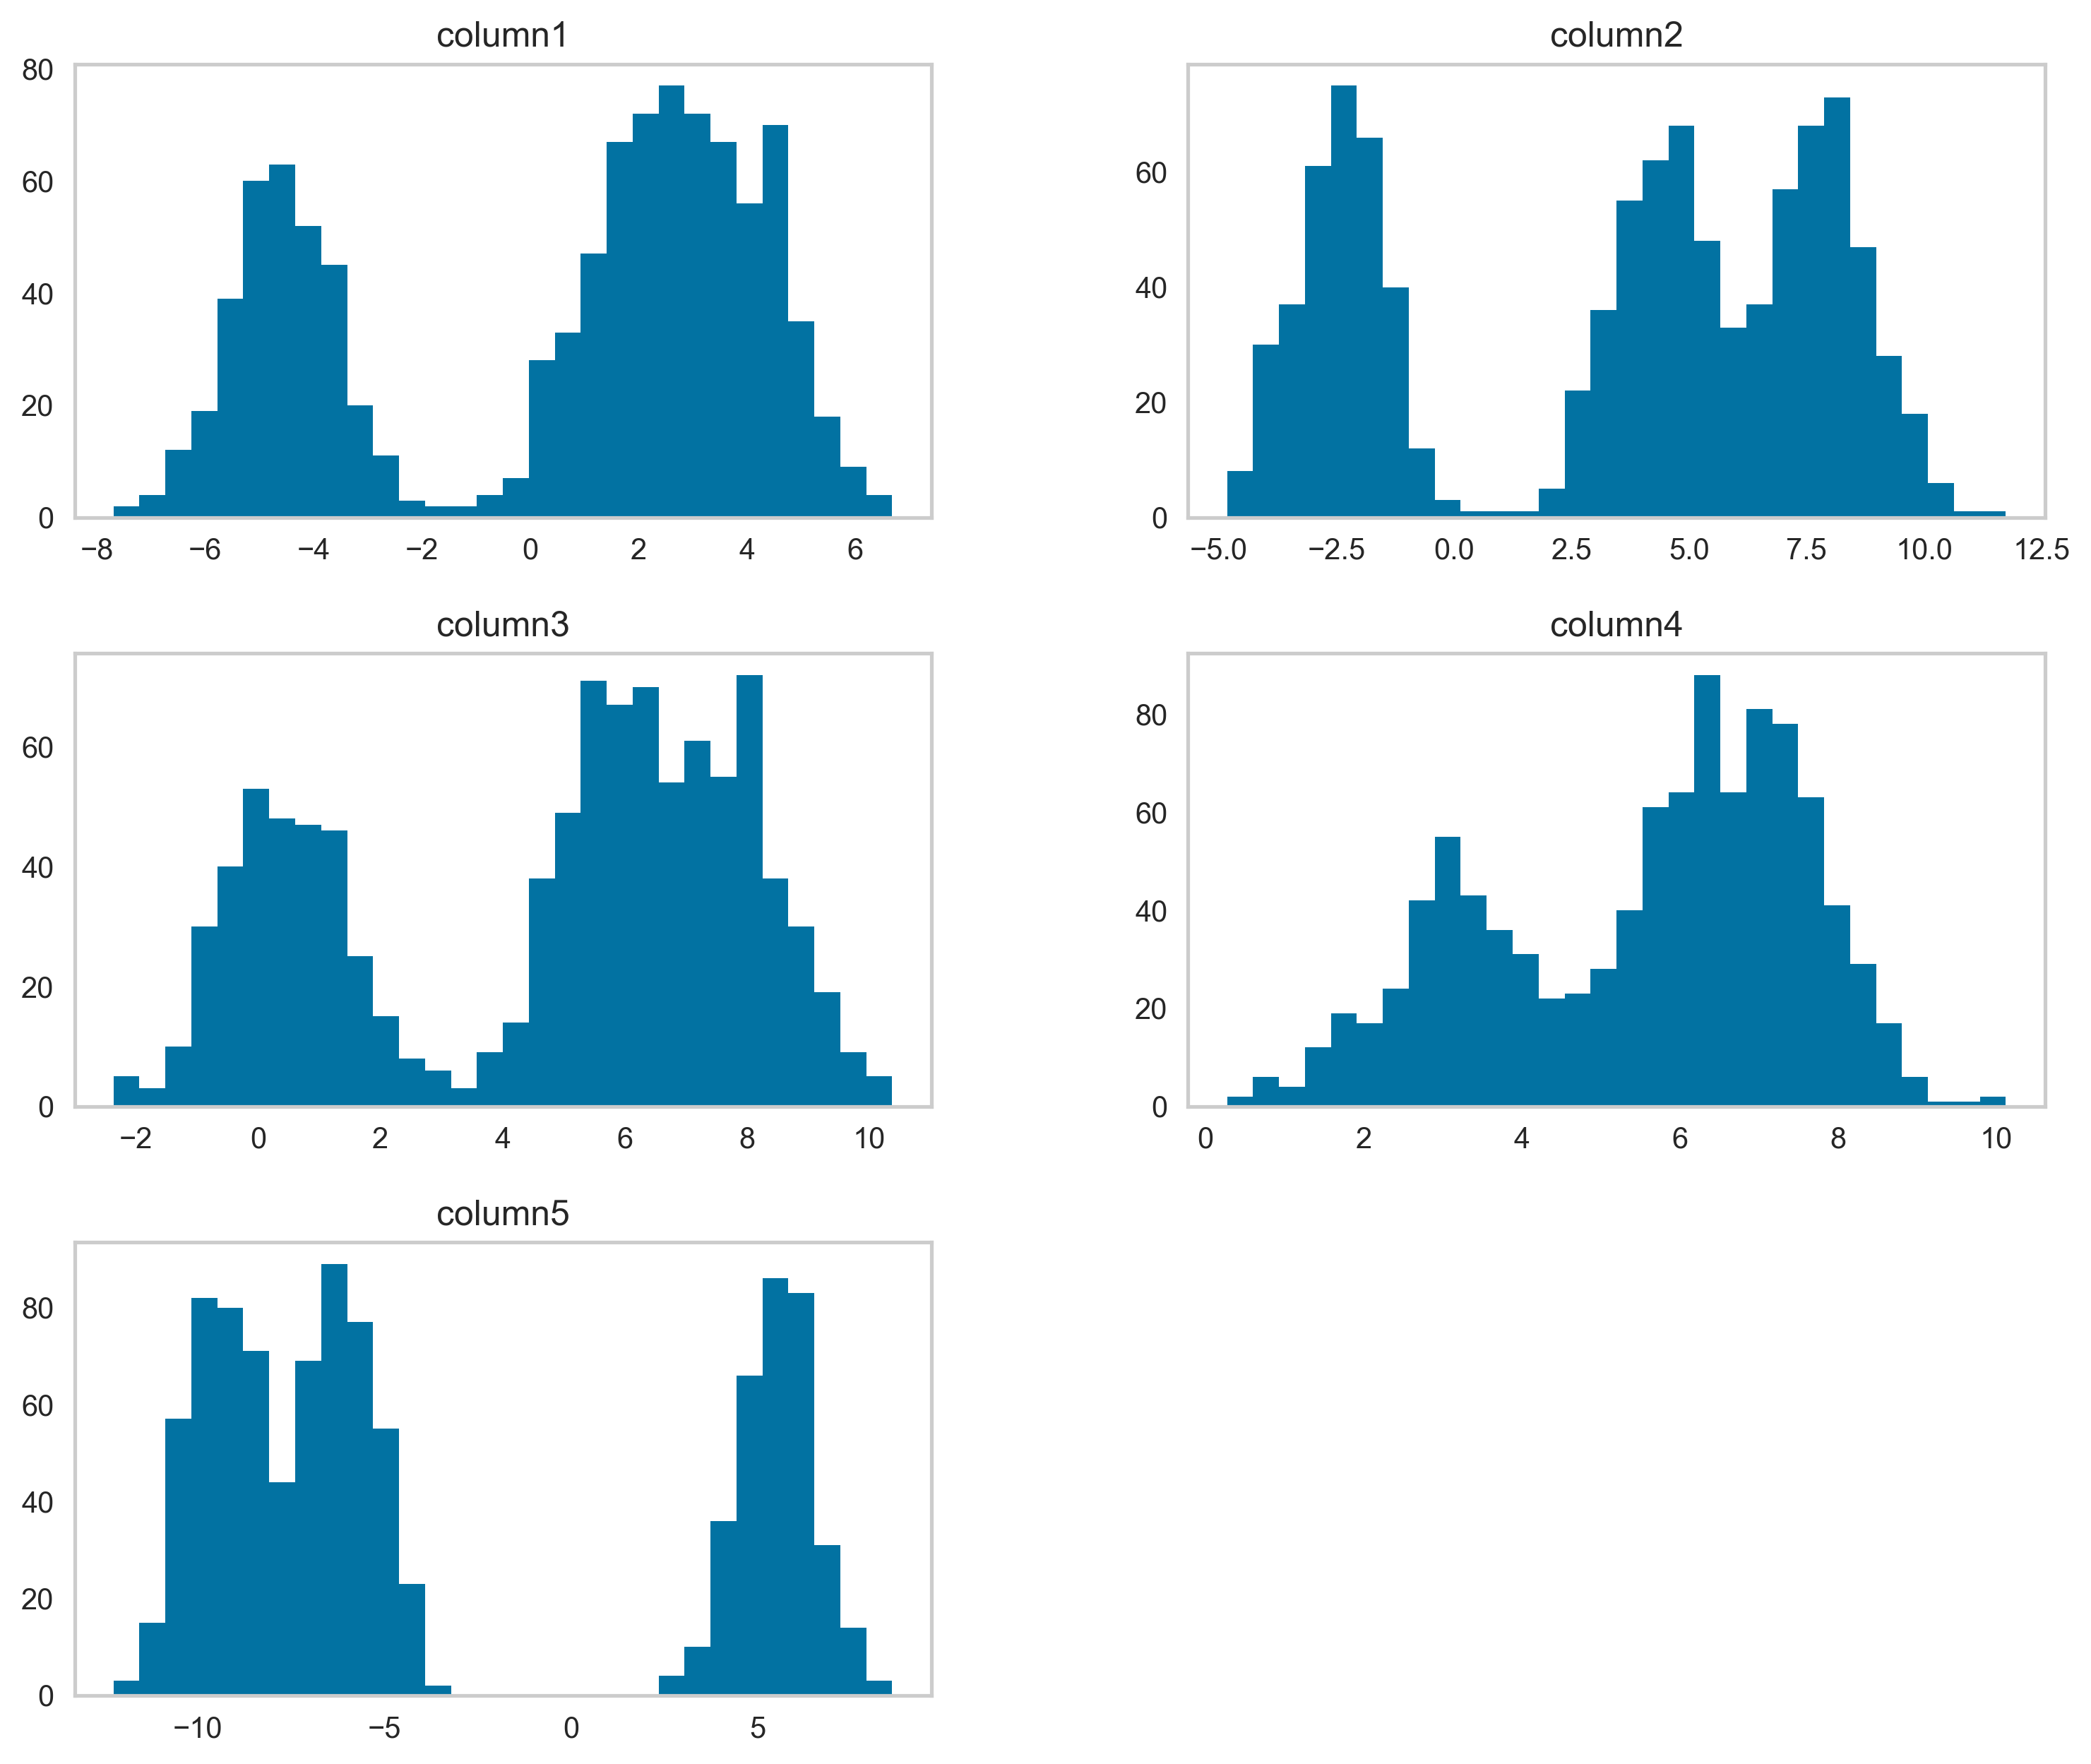

In [4]:
data.hist(bins = 30, figsize = (12,10), grid = False)
plt.show()

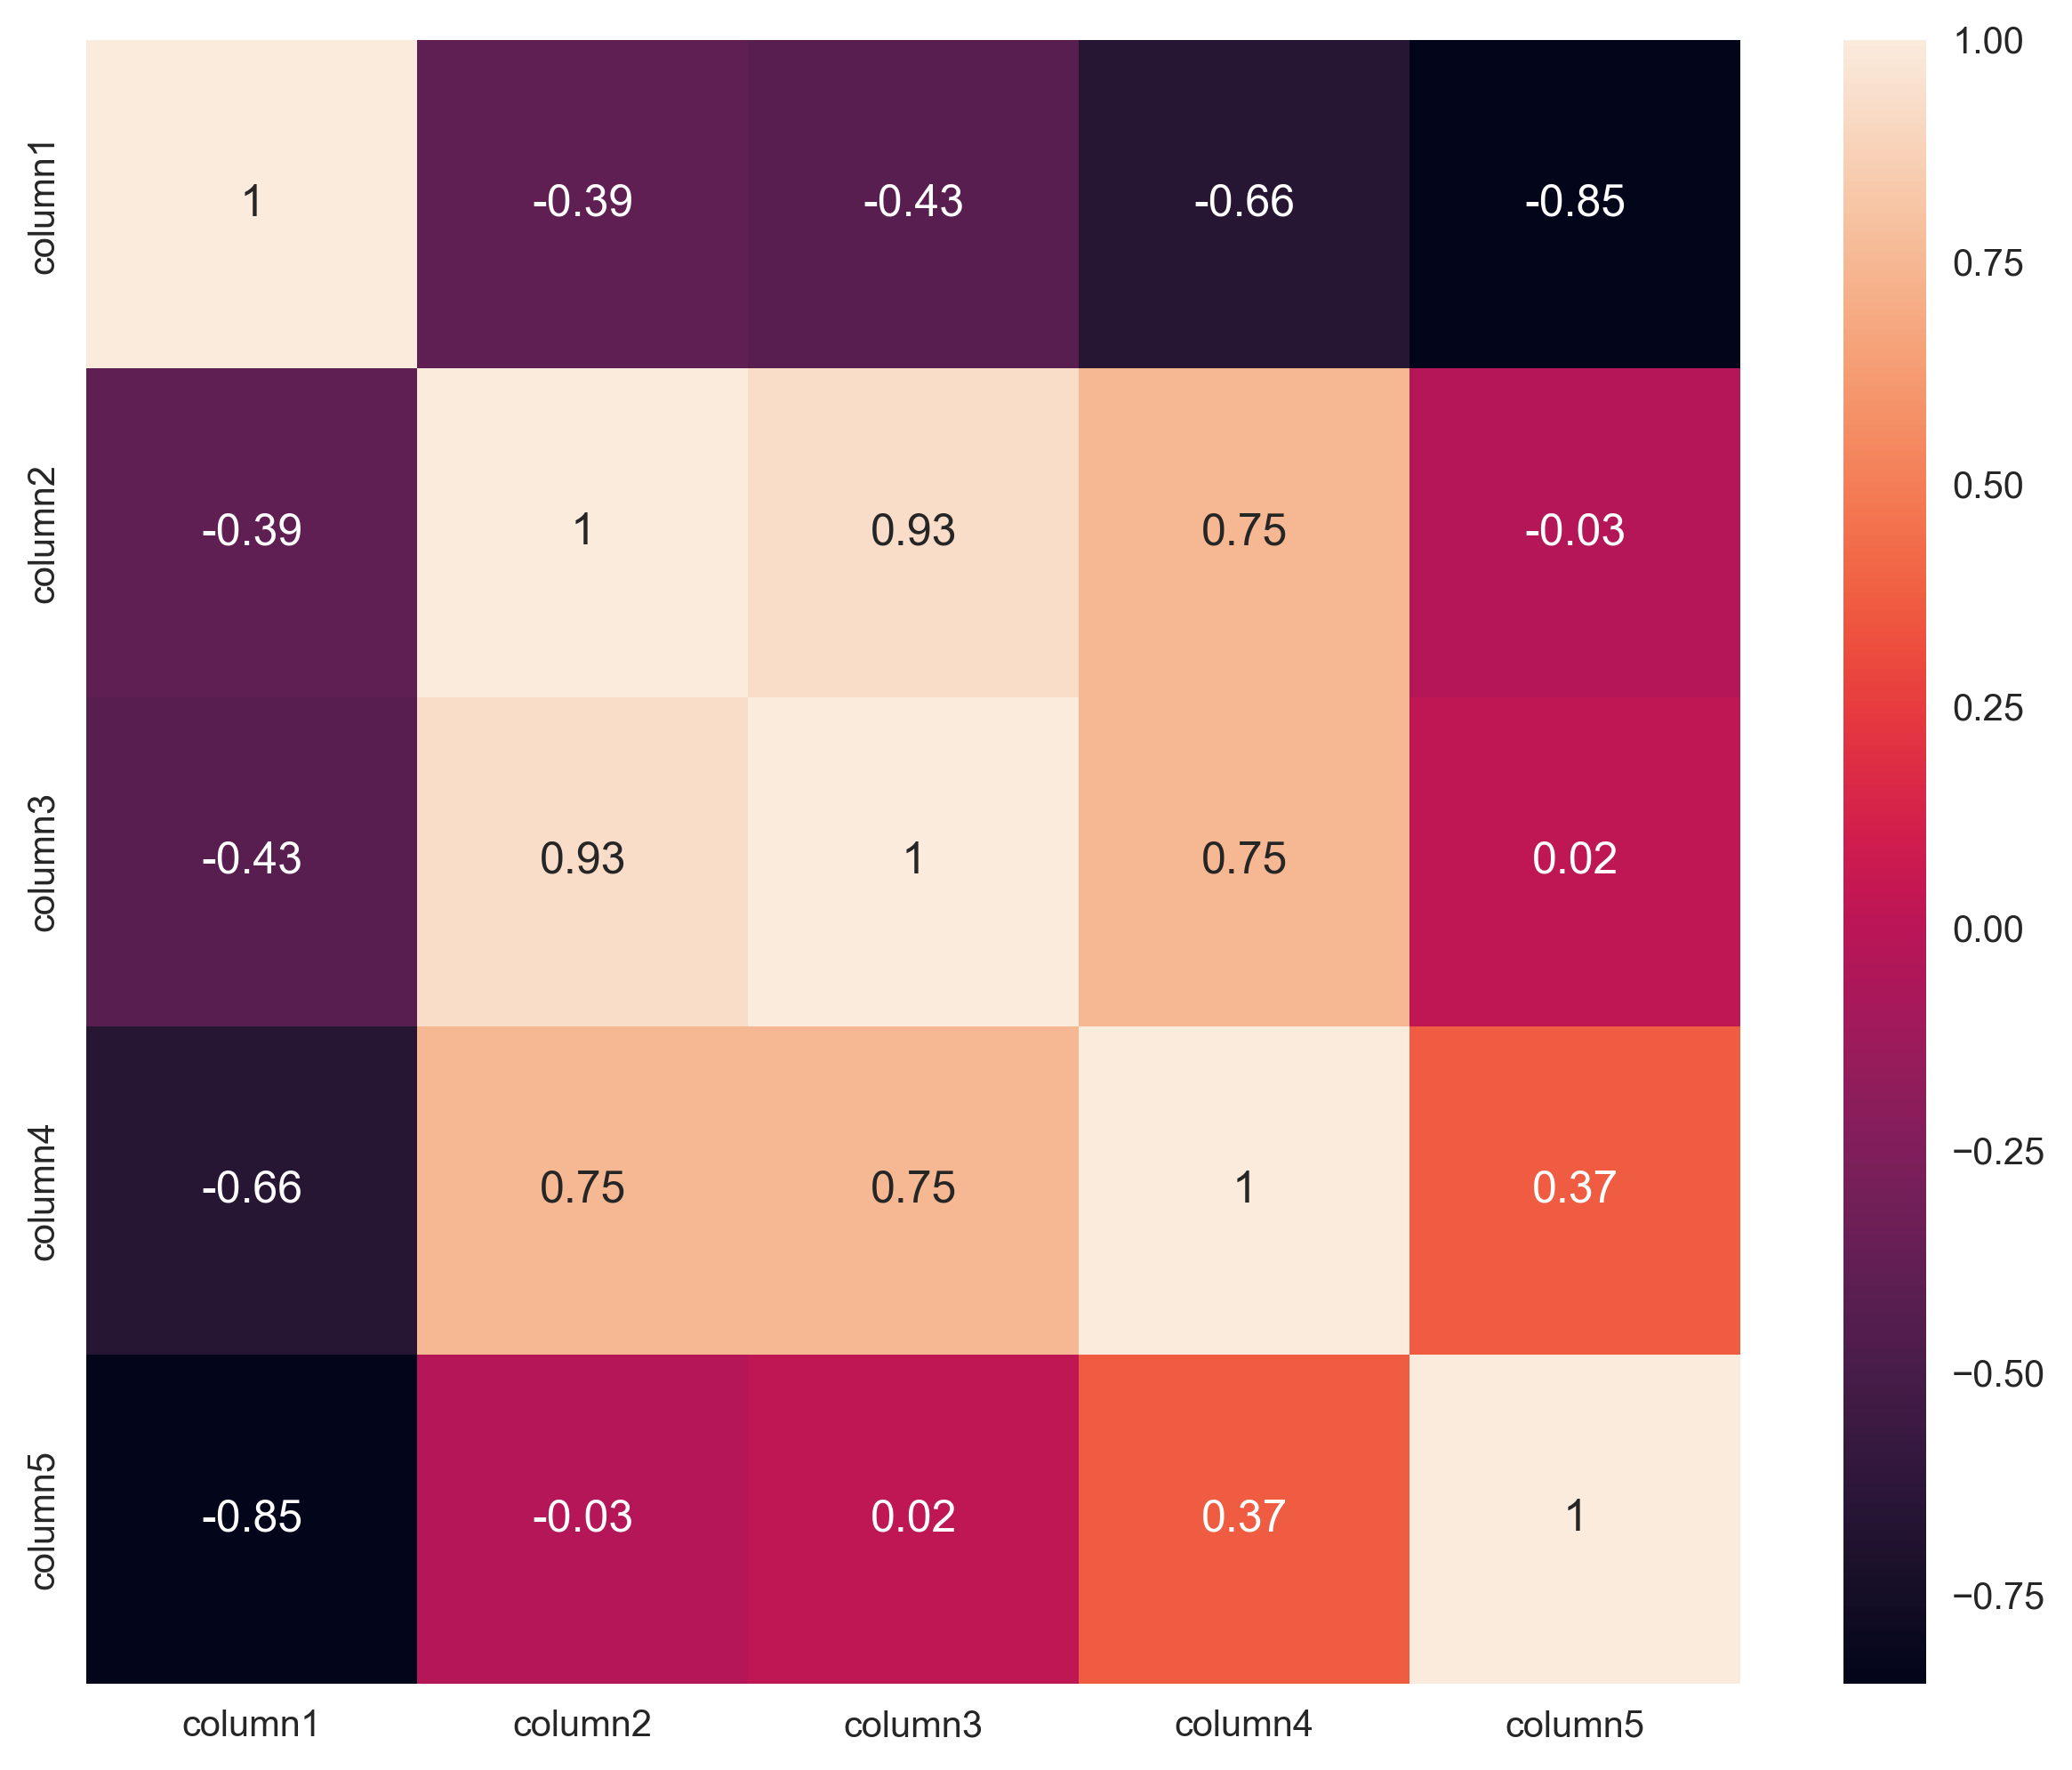

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(decimals=2), annot=True)
plt.show()

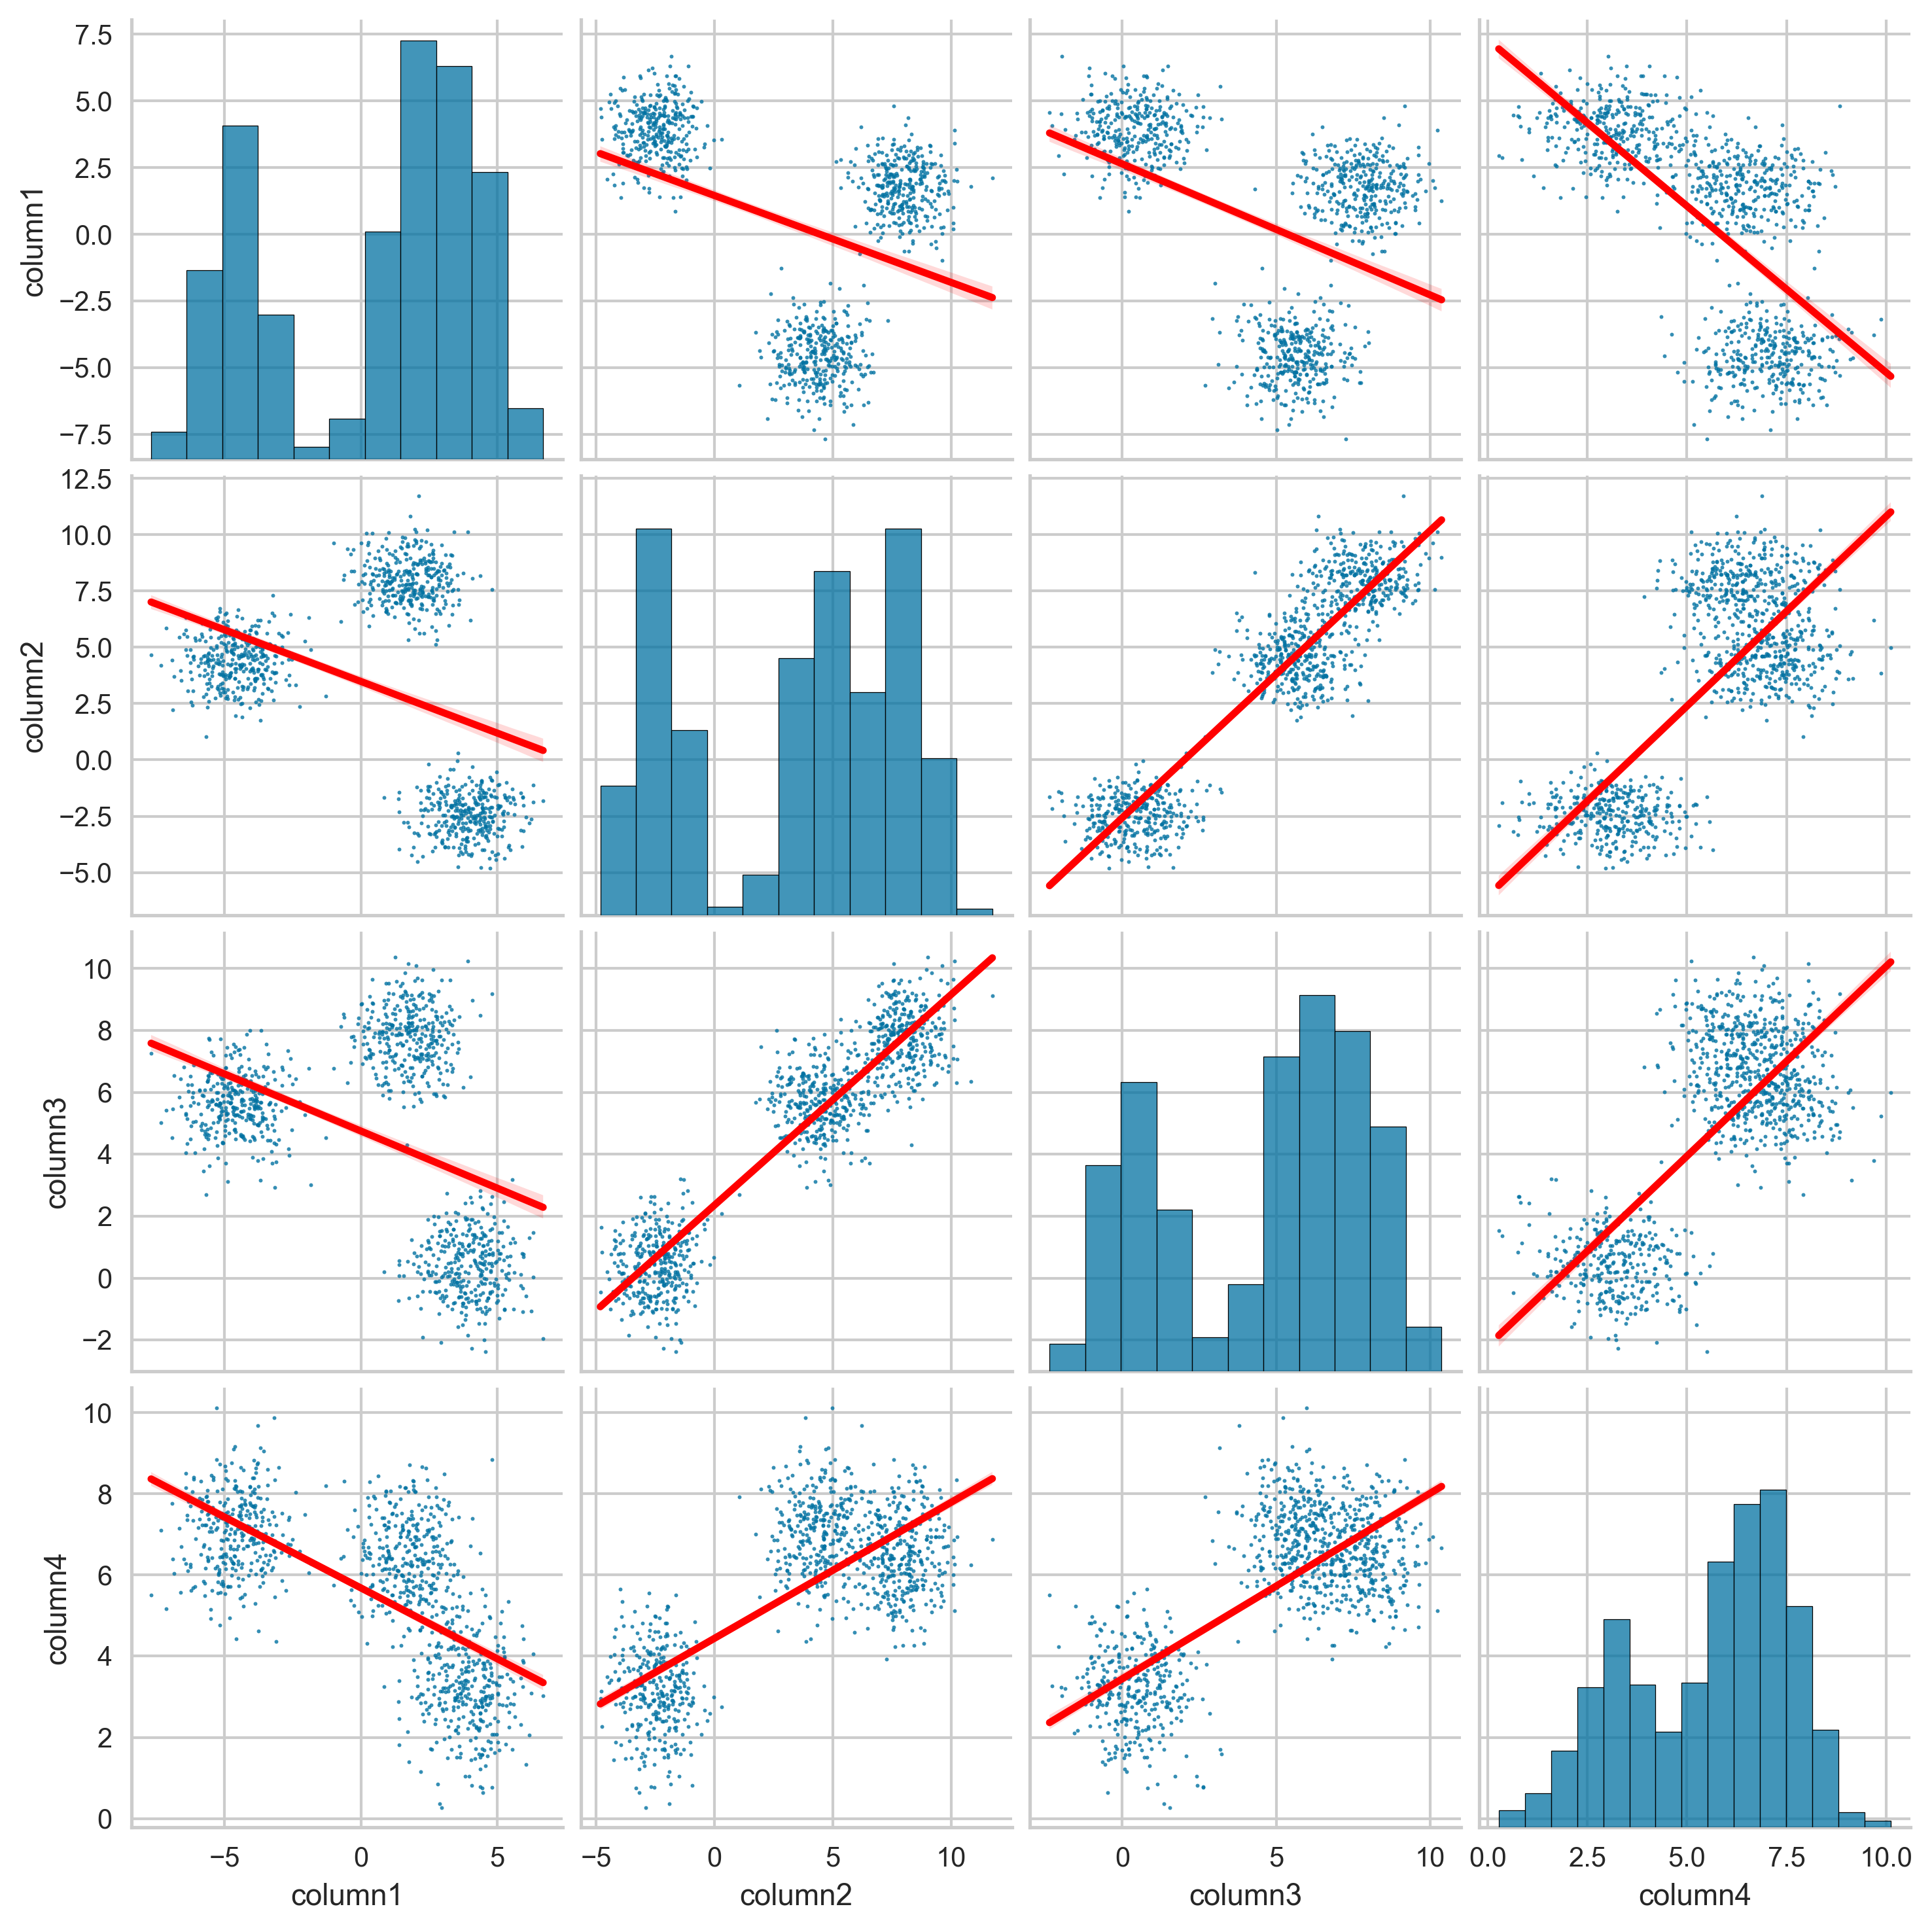

In [6]:
plot_kws = {'scatter_kws': {'s': 2}, 'line_kws': {'color': 'red'}}
sns.pairplot(data, kind='reg', vars=data.columns[:-1], plot_kws=plot_kws)
plt.show()

In [7]:
cluster = setup(data, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(1000, 5)"
2,Transformed data shape,"(1000, 5)"
3,Numeric features,5
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [8]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5721,6026.1753,1.2814,0,0,0


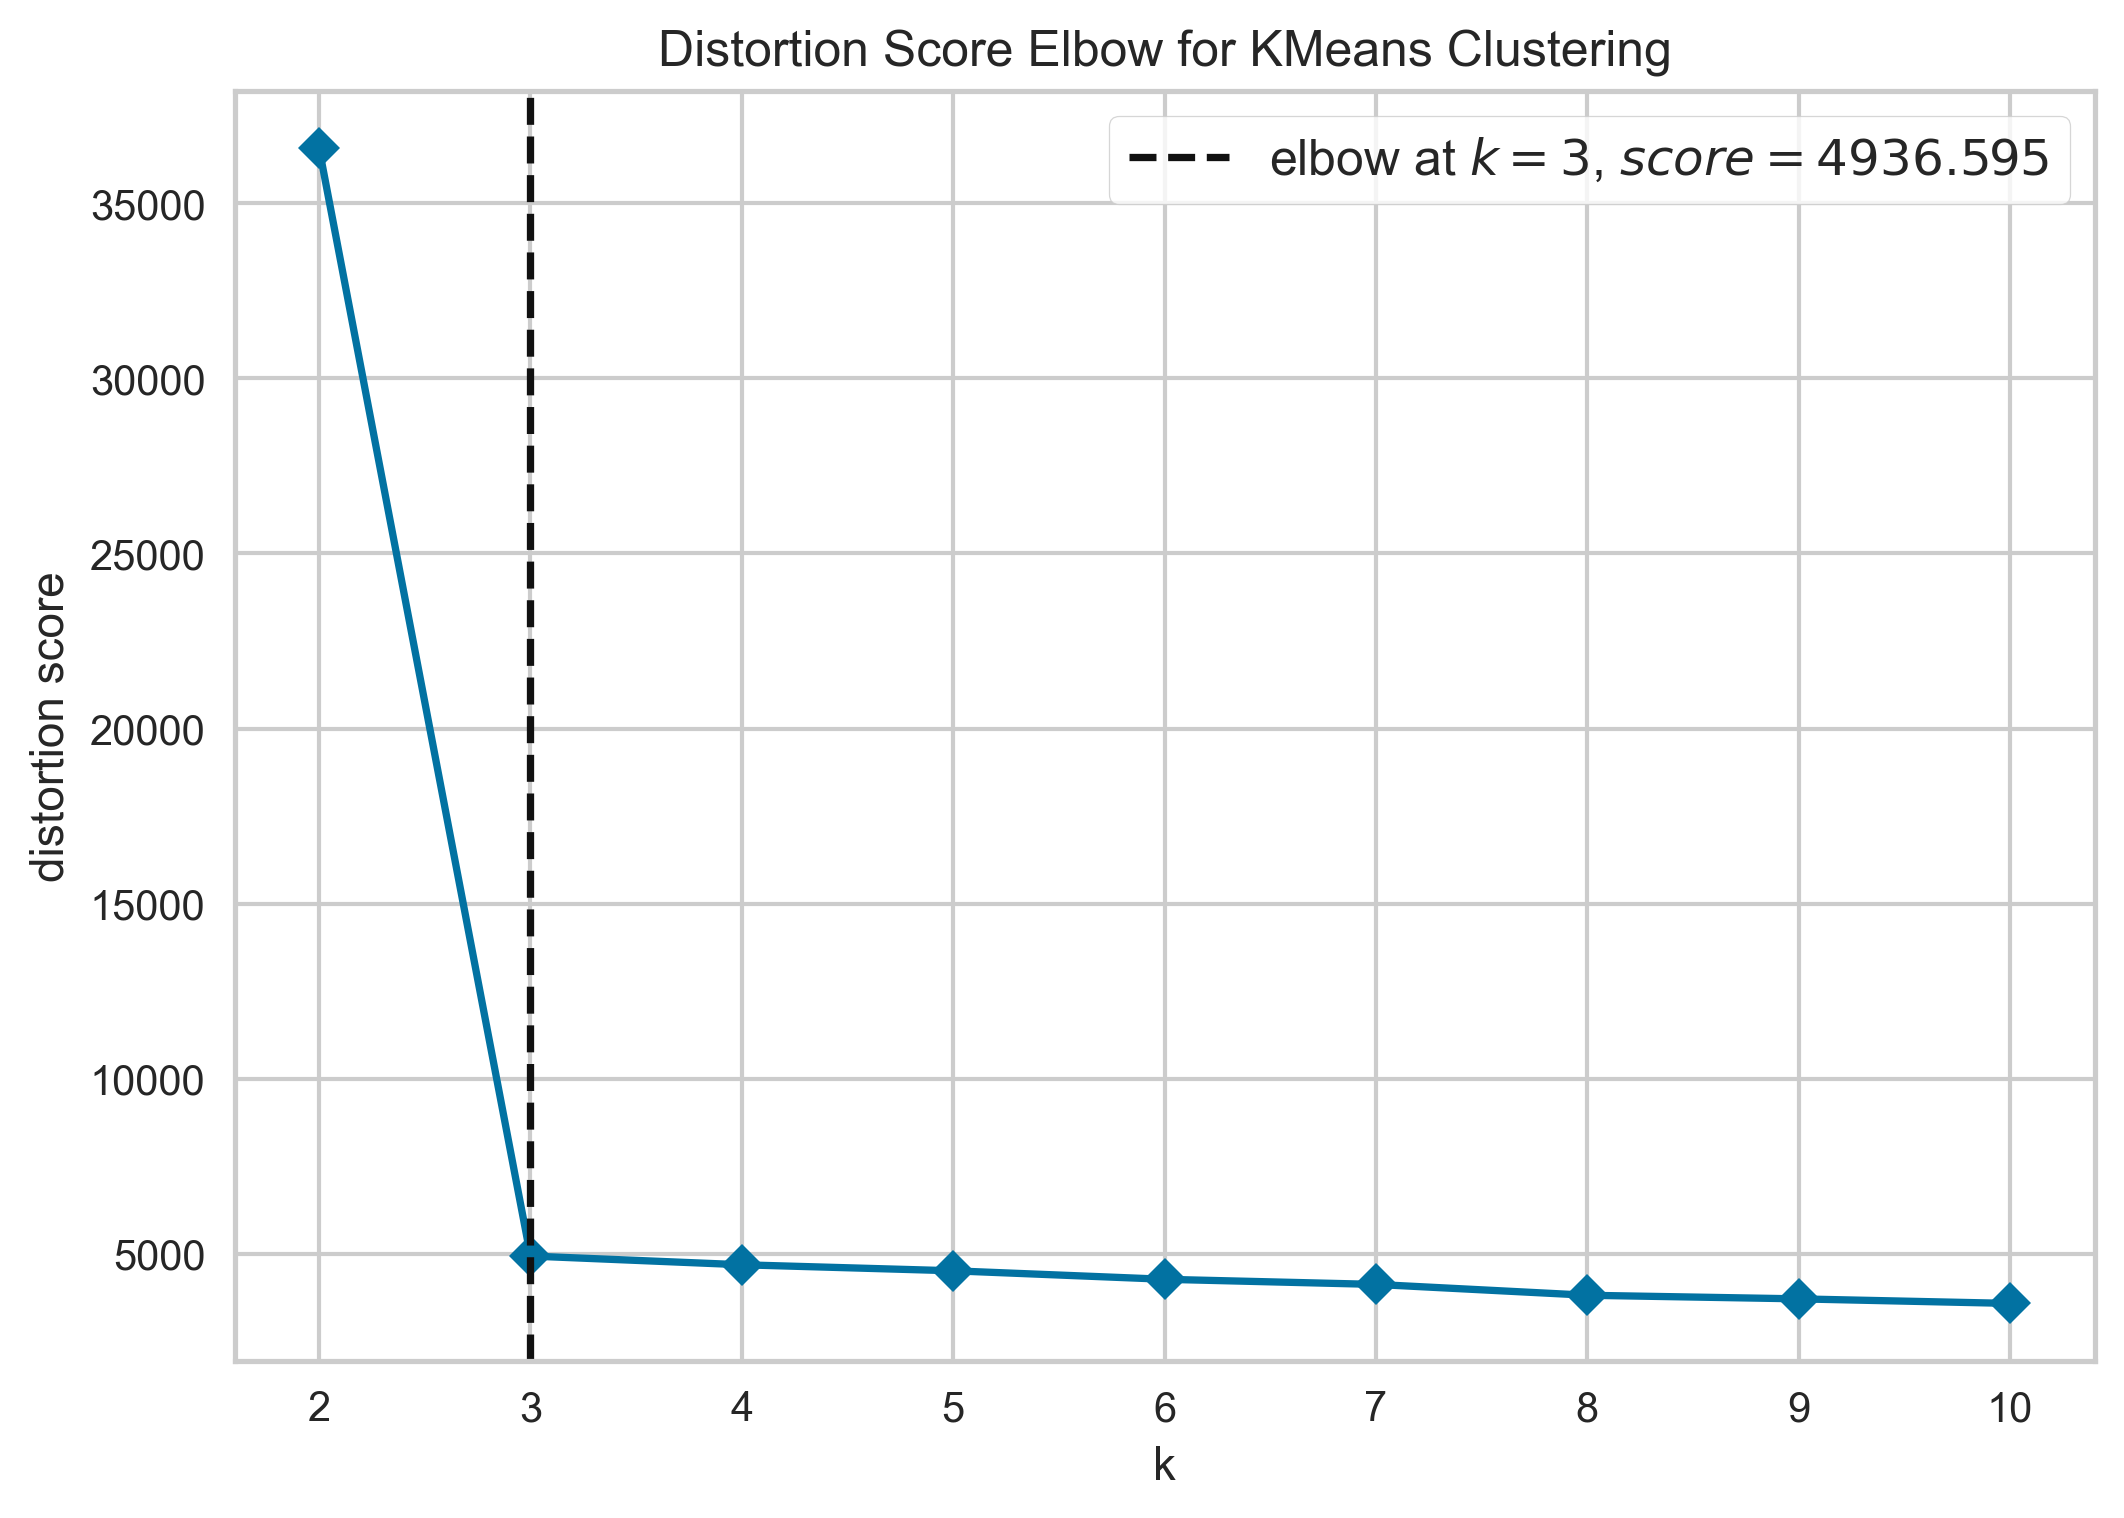

In [9]:
plot_model(model, 'elbow')

In [10]:
model = create_model('kmeans', num_clusters = 3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7972,8565.5114,0.2904,0,0,0


In [11]:
plot_model(model, 'cluster')

In [12]:
save_model(model, 'clustering_model')
results = assign_model(model)
results.head(10)

Transformation Pipeline and Model Successfully Saved


,column1,column2,column3,column4,column5,Cluster
0,2.916076,6.504857,8.246937,6.185952,-9.776482,Cluster 0
1,-2.044462,5.282757,5.265467,7.487941,6.347177,Cluster 1
2,3.439328,-3.020505,-0.783592,2.907385,-6.117881,Cluster 2
3,2.155568,8.776135,5.788650,5.751763,-7.609132,Cluster 0
4,-6.650020,5.458227,5.848407,7.150584,5.992247,Cluster 1
5,2.845247,8.015184,9.271296,6.060791,-8.281544,Cluster 0
6,-6.252012,3.910582,4.499606,6.197325,5.454781,Cluster 1
7,-4.962223,2.730723,6.787934,7.299566,5.073319,Cluster 1
8,1.727624,6.452070,6.378150,4.688653,-9.605882,Cluster 0
9,-5.568622,4.162203,7.741415,7.373318,5.787458,Cluster 1
